In [1]:
from census import Census

import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import pingouin as pg
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [4]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [5]:
#check average tempo over the years
grouped = df.groupby('year')['tempo'].mean()
type(grouped)

pandas.core.series.Series

<AxesSubplot:xlabel='year'>

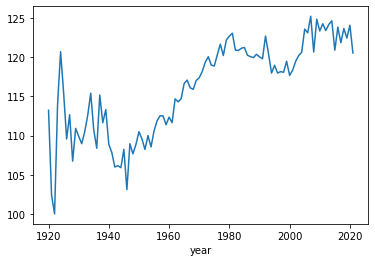

In [6]:
grouped.plot(kind='line')

In [7]:
#check average music attributes from most popular songs only over the years

#create empty dataframe to store data from most popular songs
columns_1 = df.columns[0:]
df_final = pd.DataFrame(columns = columns_1)
df_final

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


In [8]:
#create for loop to extract max popularity songs from each year and store into df_final
year_list = range(1920,2021,1)

for year in year_list:
    
    df_sample = df[df['year'] == year]
    df_new = df_sample[df_sample['popularity'] == df_sample['popularity'].max()]
    df_final = pd.concat([df_new , df_final])

df_final

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
19862,0.221,"['24kGoldn', 'iann dior']",0.700,140526,0.7220,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,2020-07-24,0.0369,90.989,0.756,2020
19866,0.468,['Ariana Grande'],0.737,172325,0.8020,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,0.682,2020
19670,0.122,['Harry Styles'],0.548,174000,0.8160,0,6UelLqGlWMcVH1E5c4H7lY,0.000000,0,0.3350,-4.209,1,Watermelon Sugar,91,2019-12-13,0.0465,95.390,0.557,2019
19470,0.483,['Sia'],0.716,165907,0.5120,0,7uoFMmxln0GPXQ0AcCBXRq,0.000000,1,0.0928,-6.257,1,Snowman,91,2018-11-01,0.0331,104.957,0.326,2018
19262,0.469,['XXXTENTACION'],0.872,119133,0.3910,1,7m9OqQk4RVRkw9JJdeAw96,0.000004,0,0.2970,-9.144,0,Jocelyn Flores,87,2017-08-25,0.2420,134.021,0.437,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0.816,"['Paul Whiteman & His Orchestra', 'Bix Beiderb...",0.678,206000,0.3950,0,59UEylF5pnWCXm91Hzk2Q9,0.240000,3,0.1000,-9.825,1,Mississippi Mud (feat. Bix Beiderbecke),15,1924,0.1330,184.446,0.832,1924
477,0.996,['Bessie Smith'],0.614,177133,0.0423,0,2wAfHM7Whz67VFbdanhZlk,0.002930,4,0.1830,-12.033,1,Nobody Knows You When You're Down and Out,41,1923,0.0535,89.822,0.211,1923
356,0.674,['Uli'],0.645,126903,0.4450,0,35iwgR4jXetI318WEWsa1Q,0.744000,0,0.1510,-13.338,1,Carve,6,1922-02-22,0.4510,104.851,0.127,1922
200,0.732,['Dennis Day'],0.819,180533,0.3410,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,6,1921,0.4150,60.936,0.963,1921


In [9]:
#briefly check sample size per year
df_final.groupby('year')['id'].count()

year
1920    1
1921    1
1922    1
1923    1
1924    1
       ..
2016    1
2017    2
2018    1
2019    1
2020    2
Name: id, Length: 101, dtype: int64

In [10]:
#check to see if the attributes we are interested in are in floats
df_final.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms          object
energy              float64
explicit             object
id                   object
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
name                 object
popularity           object
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                 object
dtype: object

In [11]:
#convert object attributes to floats
df_final['duration_ms'] = df_final['duration_ms'].astype(float)
df_final['explicit'] = df_final['explicit'].astype(int)
df_final['key'] = df_final['key'].astype(float)
df_final['popularity'] = df_final['popularity'].astype(int)

In [12]:
#convert duration to minutes and change label
df_final['duration_ms'] = df_final['duration_ms']/60000
df_final.rename(columns={'duration_ms':'duration_min'},inplace = True)

In [30]:
df_final['key'].value_counts()

0.0     21
7.0     16
9.0     13
2.0     13
1.0     13
10.0     8
5.0      7
6.0      6
3.0      5
4.0      5
8.0      4
11.0     4
Name: key, dtype: int64

In [13]:
#group by year
df_final_mean = df_final.groupby('year').mean().reset_index()
df_final_mean

,year,acousticness,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence
0,1920,0.7330,0.3390,9.135450,0.1920,0.0,0.677000,0.0,0.44300,-18.9590,28.0,0.04240,150.752,0.1800
1,1921,0.7320,0.8190,3.008883,0.3410,0.0,0.000000,7.0,0.16000,-12.4410,6.0,0.41500,60.936,0.9630
2,1922,0.6740,0.6450,2.115050,0.4450,0.0,0.744000,0.0,0.15100,-13.3380,6.0,0.45100,104.851,0.1270
3,1923,0.9960,0.6140,2.952217,0.0423,0.0,0.002930,4.0,0.18300,-12.0330,41.0,0.05350,89.822,0.2110
4,1924,0.8160,0.6780,3.433333,0.3950,0.0,0.240000,3.0,0.10000,-9.8250,15.0,0.13300,184.446,0.8320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,0.7010,0.3110,3.480450,0.4850,0.0,0.000000,6.0,0.07260,-5.7260,88.0,0.03650,77.355,0.2250
97,2017,0.2656,0.8240,2.695667,0.5855,0.5,0.000002,5.0,0.18900,-6.7590,87.0,0.18500,129.485,0.5515
98,2018,0.4830,0.7160,2.765117,0.5120,0.0,0.000000,1.0,0.09280,-6.2570,91.0,0.03310,104.957,0.3260
99,2019,0.1220,0.5480,2.900000,0.8160,0.0,0.000000,0.0,0.33500,-4.2090,91.0,0.04650,95.390,0.5570


In [18]:
df_final_mean.dtypes

year                  int64
acousticness        float64
danceability        float64
duration_min        float64
energy              float64
explicit            float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
popularity          float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [38]:
#capitalize column labels
df_final_mean.columns = df_final_mean.columns.str.title()
df_final_mean

,Year,Acousticness,Danceability,Duration_Min,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence
0,1920,0.7330,0.3390,9.135450,0.1920,0.0,0.677000,0.0,0.44300,-18.9590,28.0,0.04240,150.752,0.1800
1,1921,0.7320,0.8190,3.008883,0.3410,0.0,0.000000,7.0,0.16000,-12.4410,6.0,0.41500,60.936,0.9630
2,1922,0.6740,0.6450,2.115050,0.4450,0.0,0.744000,0.0,0.15100,-13.3380,6.0,0.45100,104.851,0.1270
3,1923,0.9960,0.6140,2.952217,0.0423,0.0,0.002930,4.0,0.18300,-12.0330,41.0,0.05350,89.822,0.2110
4,1924,0.8160,0.6780,3.433333,0.3950,0.0,0.240000,3.0,0.10000,-9.8250,15.0,0.13300,184.446,0.8320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,0.7010,0.3110,3.480450,0.4850,0.0,0.000000,6.0,0.07260,-5.7260,88.0,0.03650,77.355,0.2250
97,2017,0.2656,0.8240,2.695667,0.5855,0.5,0.000002,5.0,0.18900,-6.7590,87.0,0.18500,129.485,0.5515
98,2018,0.4830,0.7160,2.765117,0.5120,0.0,0.000000,1.0,0.09280,-6.2570,91.0,0.03310,104.957,0.3260
99,2019,0.1220,0.5480,2.900000,0.8160,0.0,0.000000,0.0,0.33500,-4.2090,91.0,0.04650,95.390,0.5570


In [14]:
#save clean data to csv
df_final_mean.to_csv('Popularity_df_mean.csv')

In [15]:
#extract column headers to use for loop to generate plots
column_list = df_final_mean.columns[1:]
column_list

Index(['Acousticness', 'Danceability', 'Duration_Min', 'Energy', 'Explicit',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Popularity',
       'Speechiness', 'Tempo', 'Valence'],
      dtype='object')

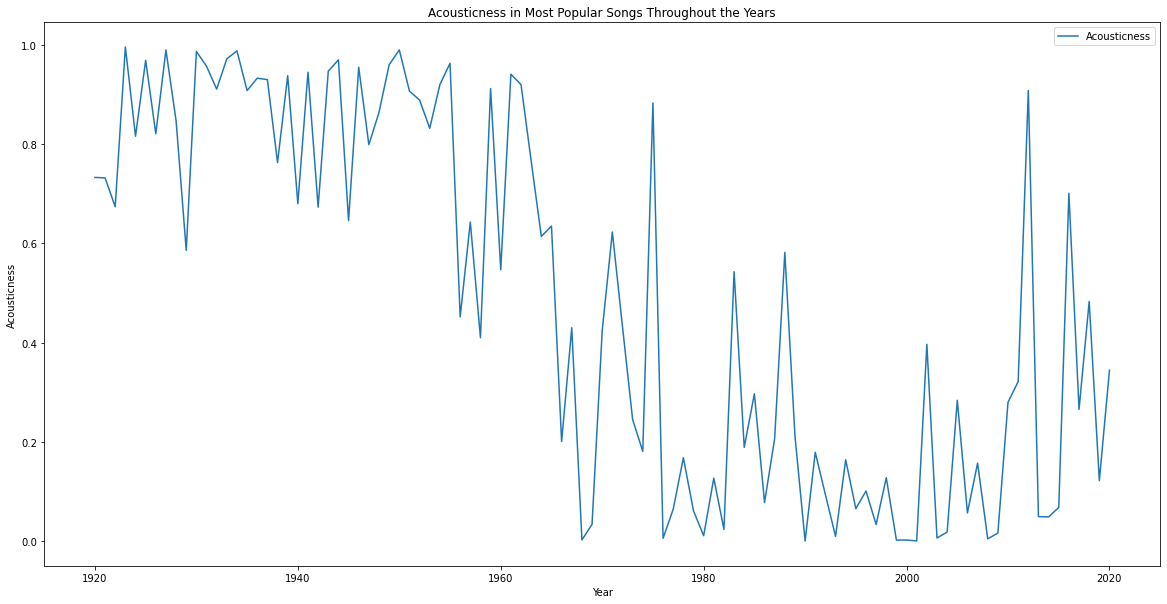

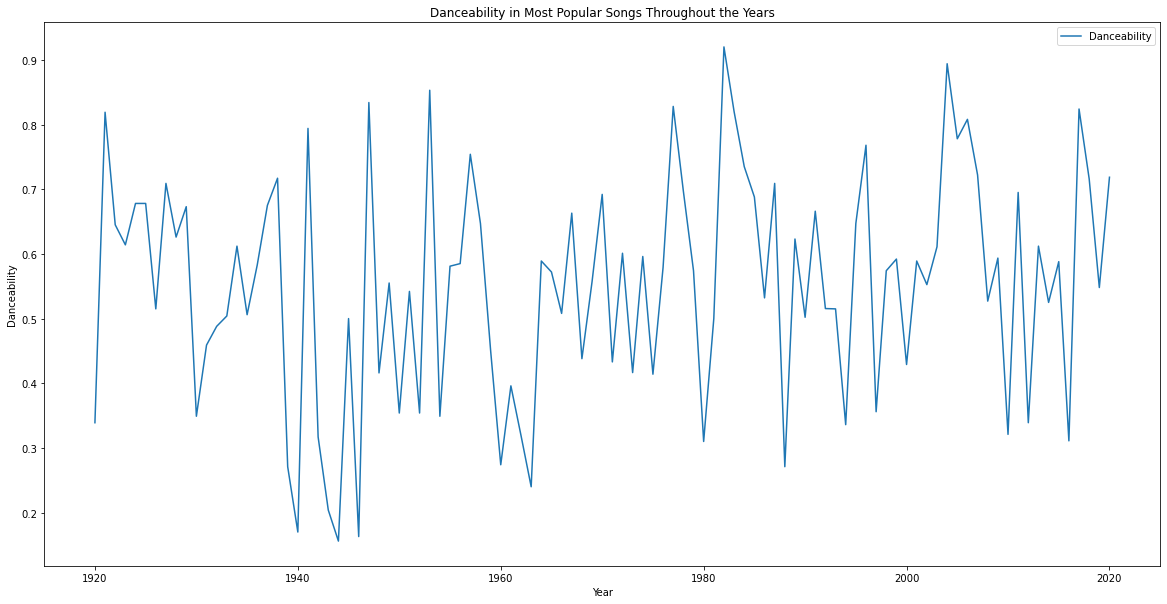

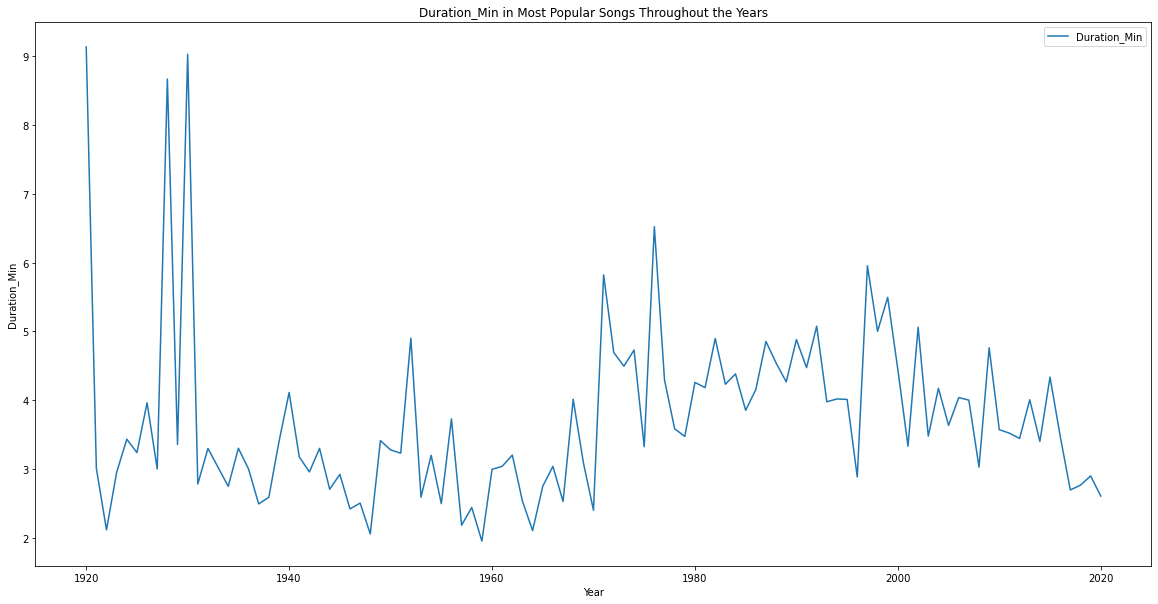

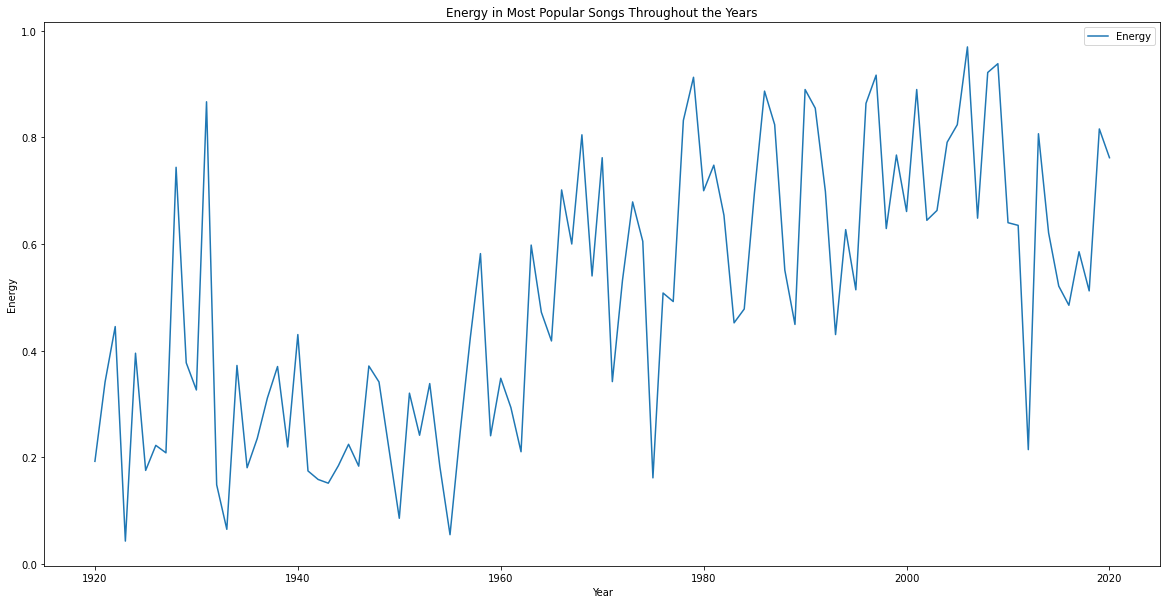

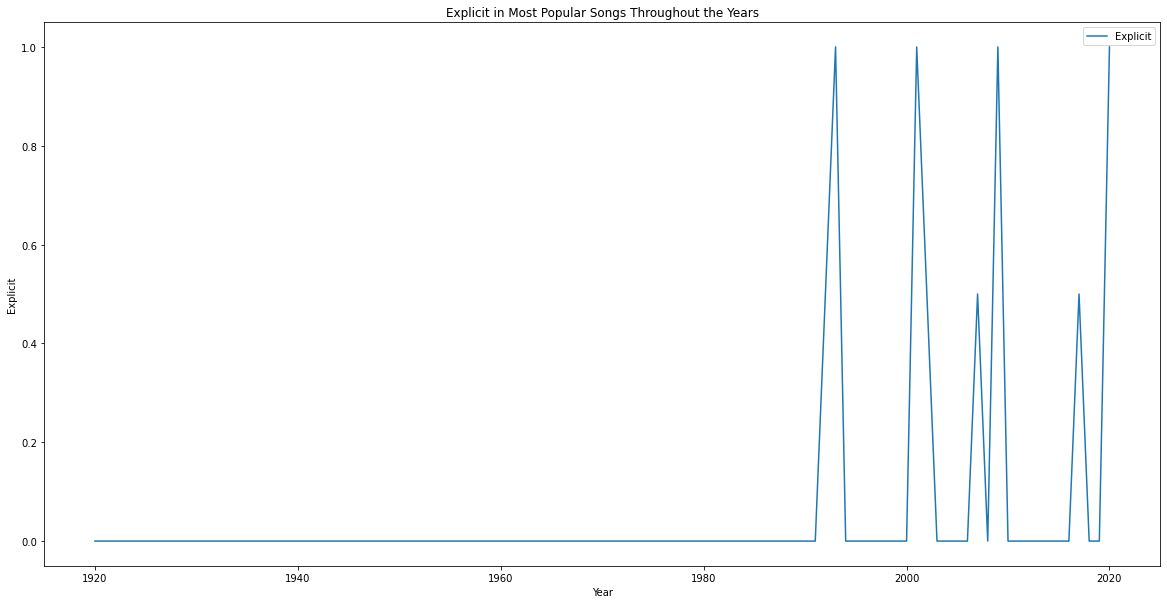

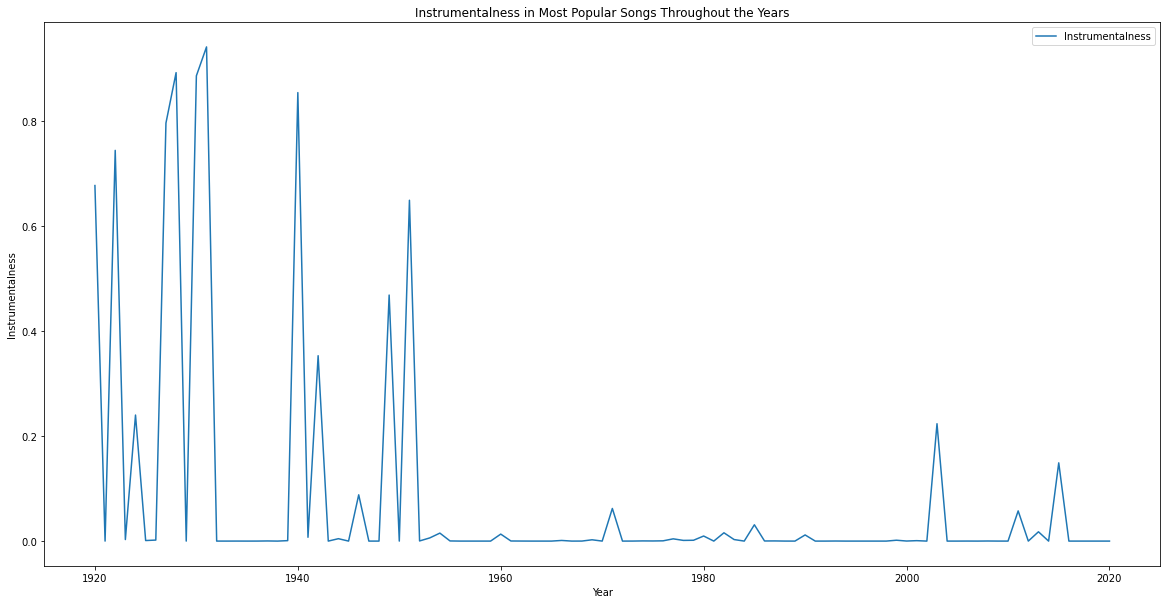

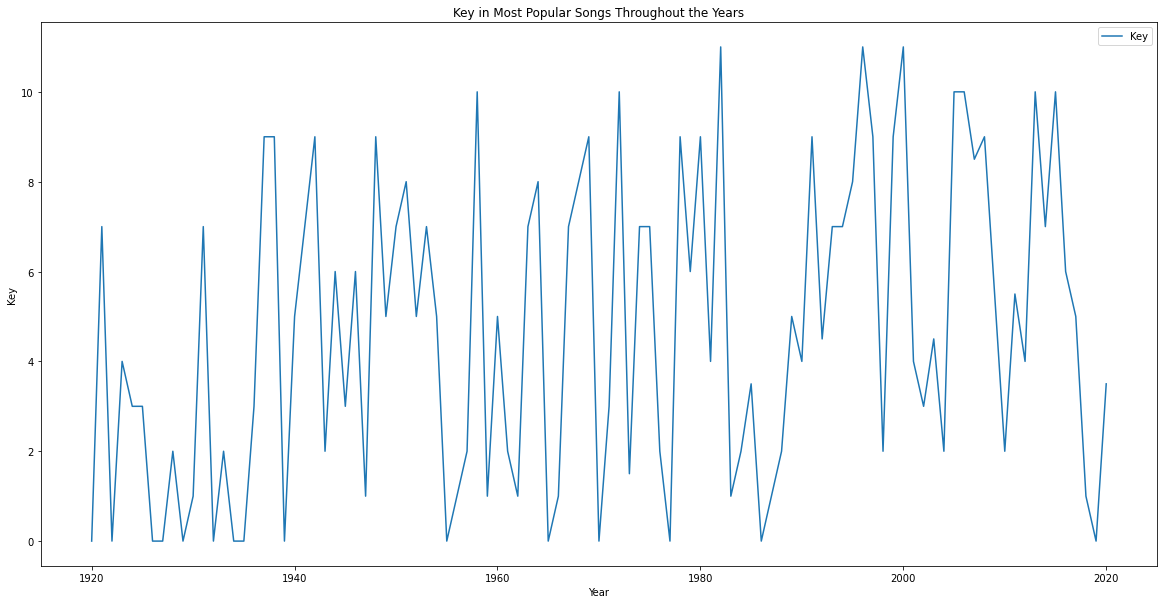

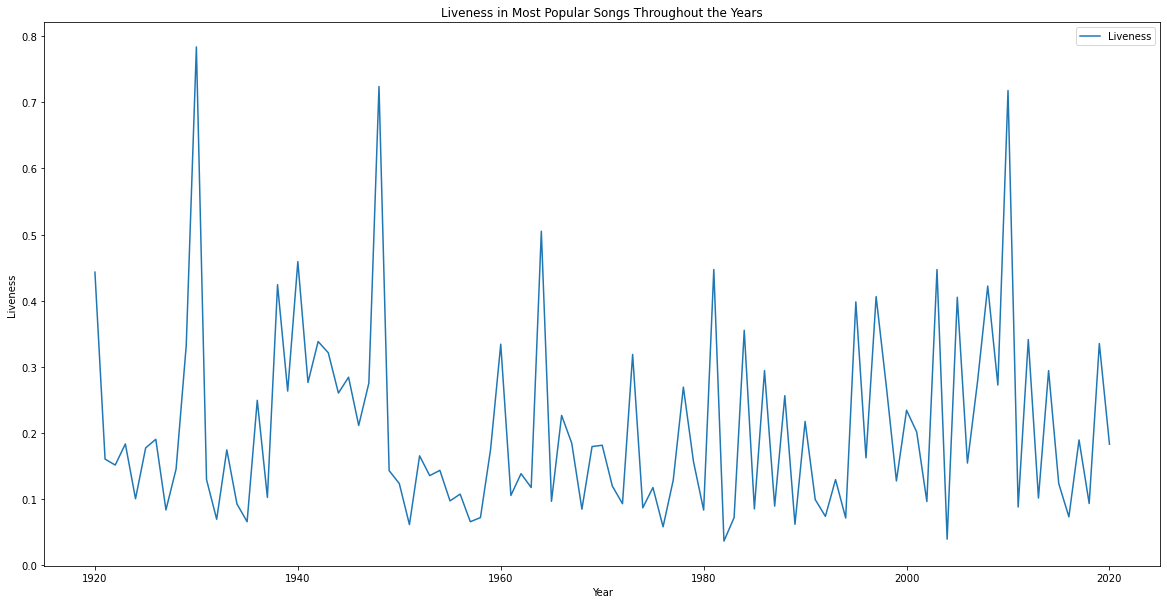

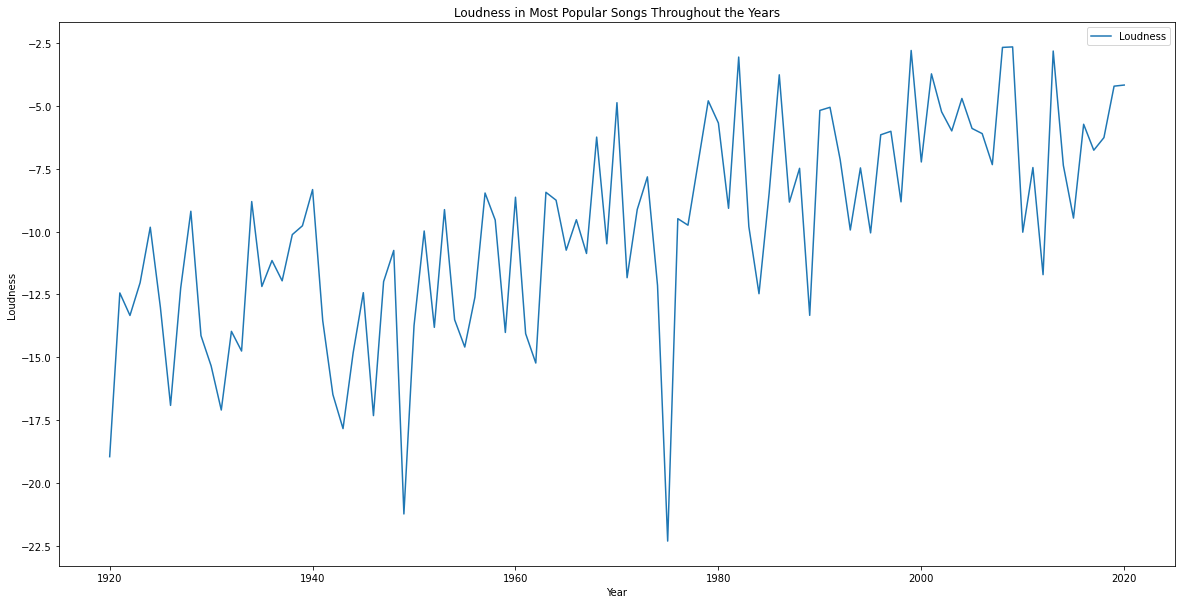

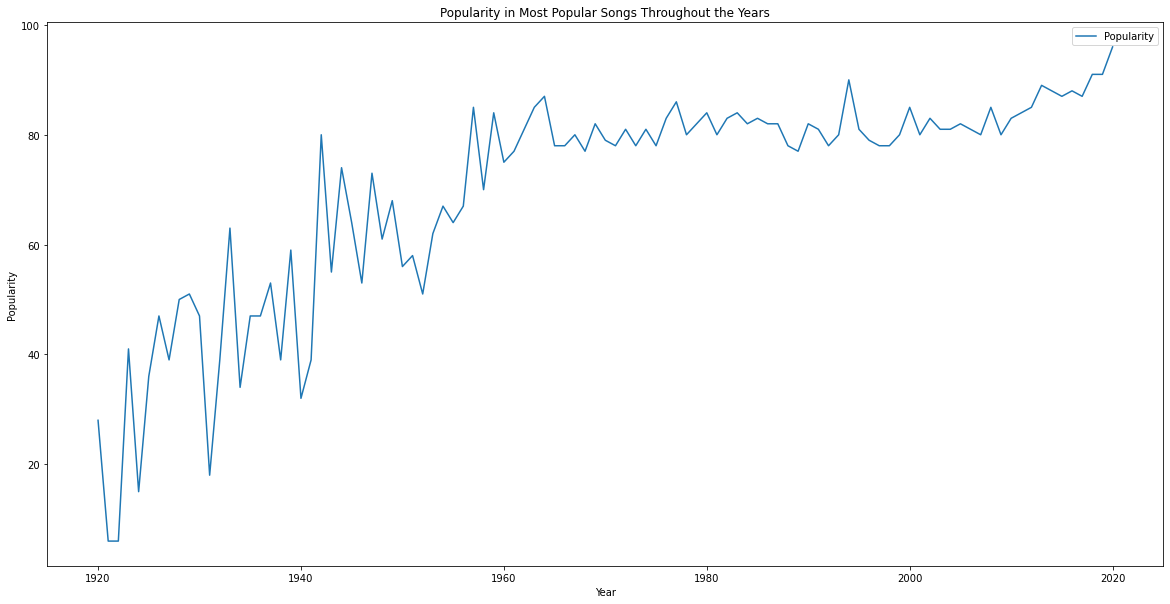

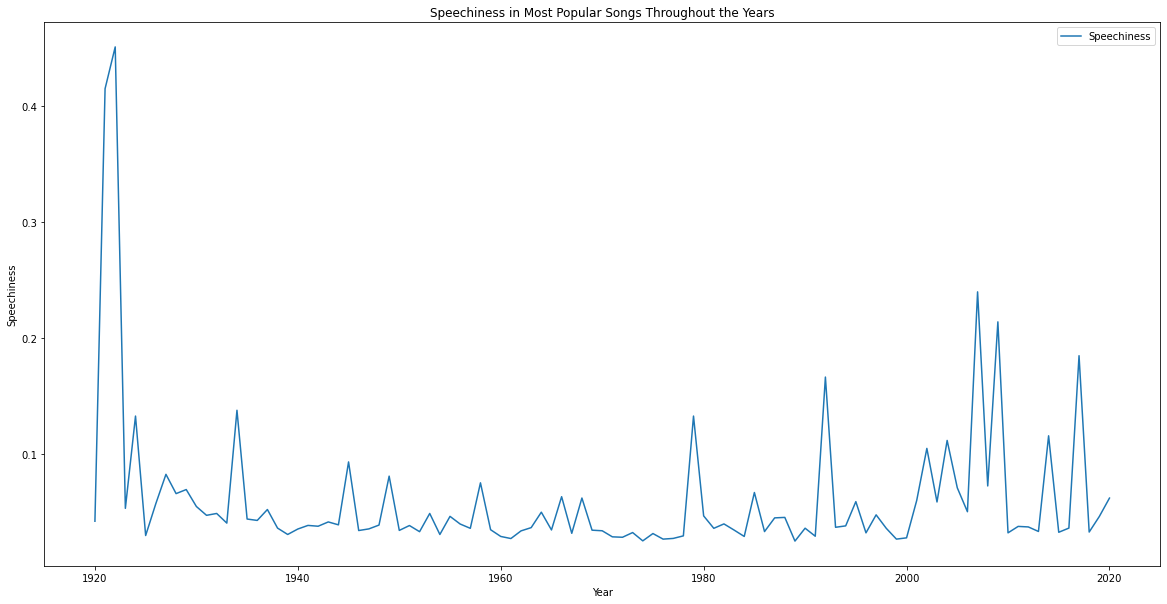

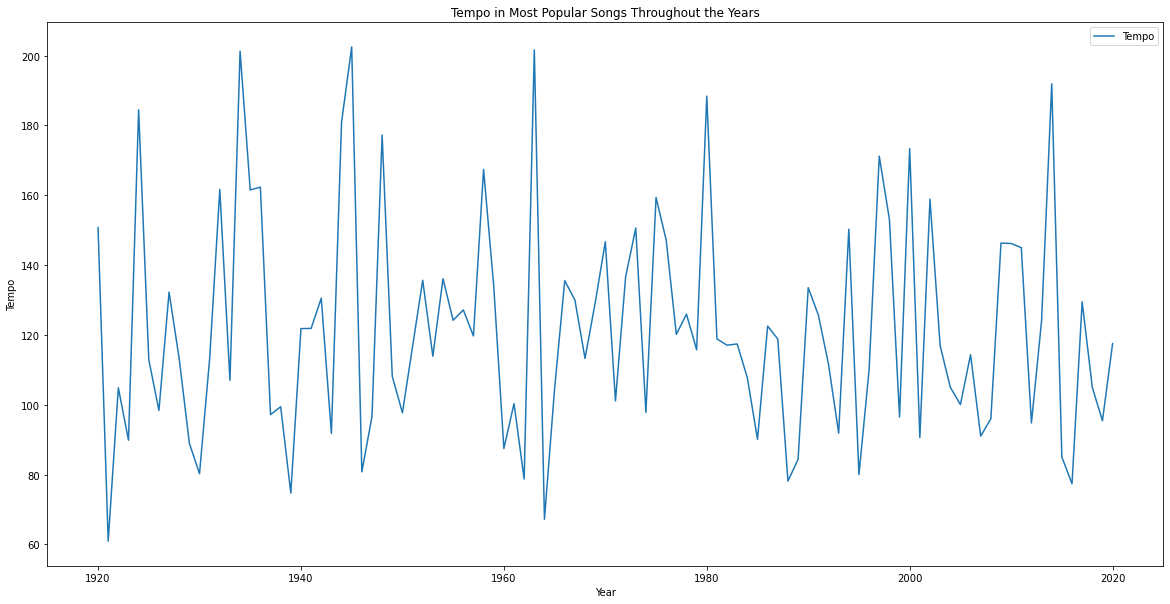

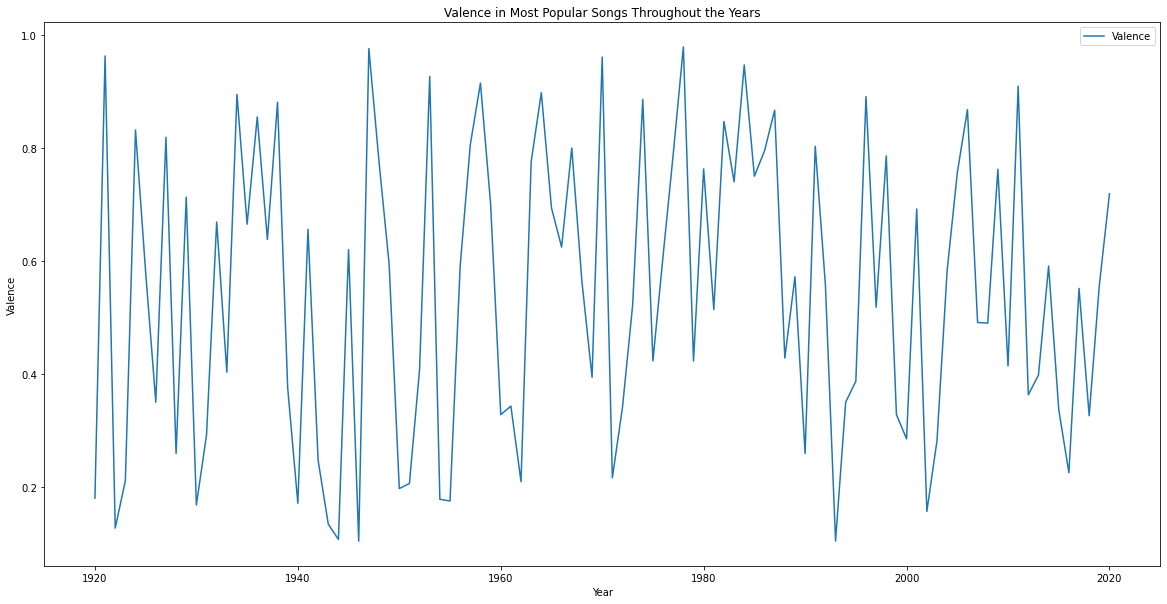

In [16]:
#use loop statement to generate all of the plots
for i in column_list:
    df_final_mean.plot(kind='line',x='Year',y=i,figsize=(20,10))
    plt.title(f'{i} in Most Popular Songs Throughout the Years')
    plt.xlabel('Year')
    plt.ylabel(i)
    plt.show();

In [17]:
columns_2 = df.columns[0:]
df_final2 = pd.DataFrame(columns = columns_2)
df_final2

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year


In [18]:
for year in year_list:
    
    df_sample2 = df[df['year'] == year]
    df_new2 = df_sample2[df_sample2['popularity'] == df_sample2['popularity'].min()]
    df_final2 = pd.concat([df_new2 , df_final2])

df_final2

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
28565,0.95200,['Alan King'],0.535,256623,0.482,0,2SAVRKmLj3WCMNDuINR59y,0.000002,11,0.9690,-15.272,1,New Year's With The Wife - Live On The Ed Sull...,0,2020-08-21,0.8430,127.343,0.450,2020
35869,0.76200,['Noah Nell'],0.333,122739,0.384,0,1C2HqWxFTxFb2ohwC2YJSo,0.919000,6,0.0831,-10.126,1,2003,0,2020-05-31,0.0439,175.886,0.162,2020
35911,0.94200,['Prada 6ix'],0.388,198113,0.367,0,0OtMt8npWJwJoAh189Nhua,0.865000,9,0.1050,-15.831,0,Last Year In Hawaii,0,2020-10-31,0.0373,80.029,0.117,2020
36357,0.04570,['Teqnify'],0.728,229392,0.394,0,3hIyGFsVP6uKuPMaP0qDBi,0.235000,6,0.1030,-12.004,1,The Distant Year 2005,0,2020-06-11,0.0495,90.011,0.565,2020
36381,0.06900,['Noah Nell'],0.671,170688,0.665,0,2hwBj4joyet3sru7mWxbtB,0.858000,9,0.2290,-7.240,0,2005,0,2020-05-31,0.1020,179.891,0.269,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20404,0.70300,['FPS Allstars'],0.699,41000,0.858,0,6pzESk17jft2uoqpygELTO,0.945000,1,0.2390,-9.884,1,Formula One: Beyond the Limit [Genesis Mix],0,1920-01-04,0.0719,117.825,0.788,1920
20405,0.91100,"[""L'Orchestra Cinematique""]",0.225,138267,0.504,0,76kw576lv8xBHNCRy0Aoyt,0.985000,4,0.1080,-10.397,1,Doctor Who (from the original Television series),0,1920-01-03,0.0381,137.615,0.498,1920
20406,0.06460,['Level-Up'],0.357,81525,0.169,0,7J4ptycyI9TTFupYKRiMx9,0.000000,5,0.1790,-4.375,1,"Aerobiz Supersonic Menu Theme (From ""Aerobiz S...",0,1920-01-04,0.0546,150.069,0.418,1920
20408,0.00211,['8BitAllstars'],0.518,128500,0.661,0,7mImzr321xaGQu0cZy26uf,0.864000,3,0.1590,-6.920,1,"Super Hang-On Theme (From ""Super Hang-On"") [Ge...",0,1920-01-04,0.0327,125.009,0.793,1920


In [19]:
df_final2['duration_ms'] = df_final2['duration_ms'].astype(float)
df_final2['explicit'] = df_final2['explicit'].astype(int)
df_final2['key'] = df_final2['key'].astype(float)
df_final2['popularity'] = df_final2['popularity'].astype(int)

In [20]:
df_final2['duration_ms'] = df_final2['duration_ms']/60000
df_final2.rename(columns={'duration_ms':'duration_min'},inplace = True)

In [21]:
df_final_mean2 = df_final2.groupby('year').mean().reset_index()

In [22]:
df_final_mean2.columns = df_final_mean2.columns.str.title()
df_final_mean2

,Year,Acousticness,Danceability,Duration_Min,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Valence
0,1920,0.640846,0.516549,3.938092,0.423214,0.120141,0.356752,4.706714,0.209104,-12.449703,0.0,0.086583,111.751064,0.502686
1,1921,0.872131,0.436558,3.908326,0.251645,0.079365,0.316502,5.261905,0.205060,-16.202675,0.0,0.080456,103.072683,0.410313
2,1922,0.828849,0.576345,2.331744,0.223814,0.000000,0.252804,4.865546,0.258060,-20.960563,0.0,0.467793,99.660378,0.576361
3,1923,0.932936,0.519702,2.789741,0.313604,0.000000,0.462729,4.619048,0.243057,-15.914131,0.0,0.103533,111.833821,0.635632
4,1924,0.942001,0.530802,3.197223,0.343132,0.000000,0.633596,5.484375,0.237116,-14.785089,0.0,0.096912,120.818297,0.648590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,0.211349,0.589987,5.566056,0.643902,0.039872,0.453376,5.480064,0.195154,-9.662890,0.0,0.093800,124.878206,0.380728
97,2017,0.148548,0.572484,5.088291,0.727735,0.127874,0.381001,5.436782,0.217695,-8.378001,0.0,0.084080,123.772086,0.452951
98,2018,0.211362,0.585053,4.520345,0.683801,0.123249,0.372382,5.849673,0.241099,-9.085255,0.0,0.125817,123.913927,0.405655
99,2019,0.261473,0.566946,4.213946,0.624333,0.121643,0.403875,5.796209,0.214557,-10.030578,0.0,0.098020,124.586297,0.411188


In [23]:
df_final_mean2.to_csv('LowPopularity_df_mean.csv')

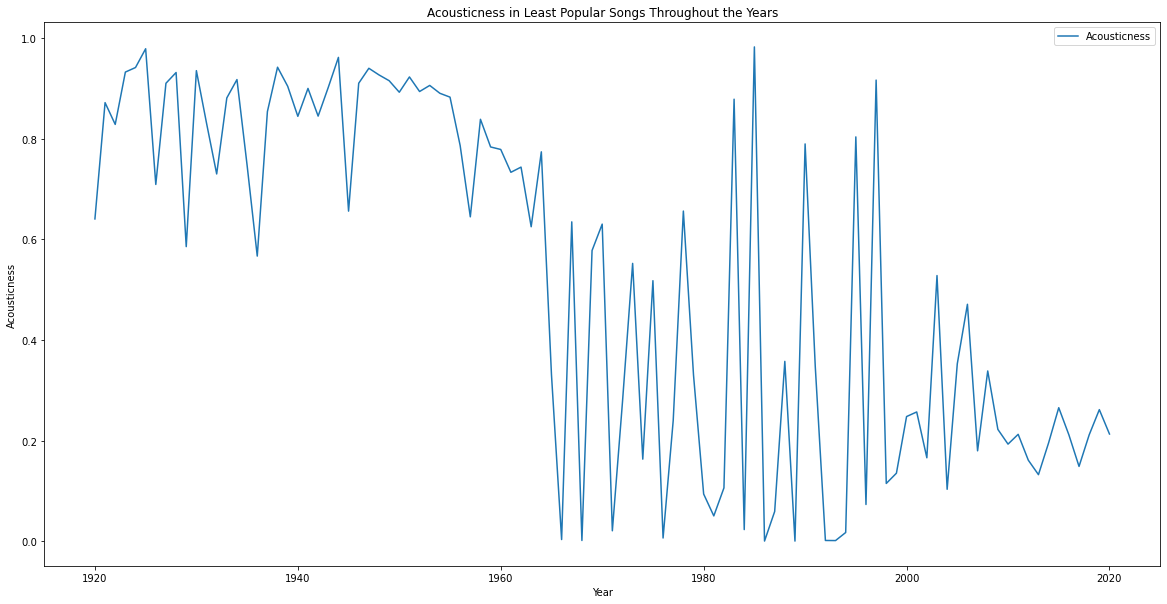

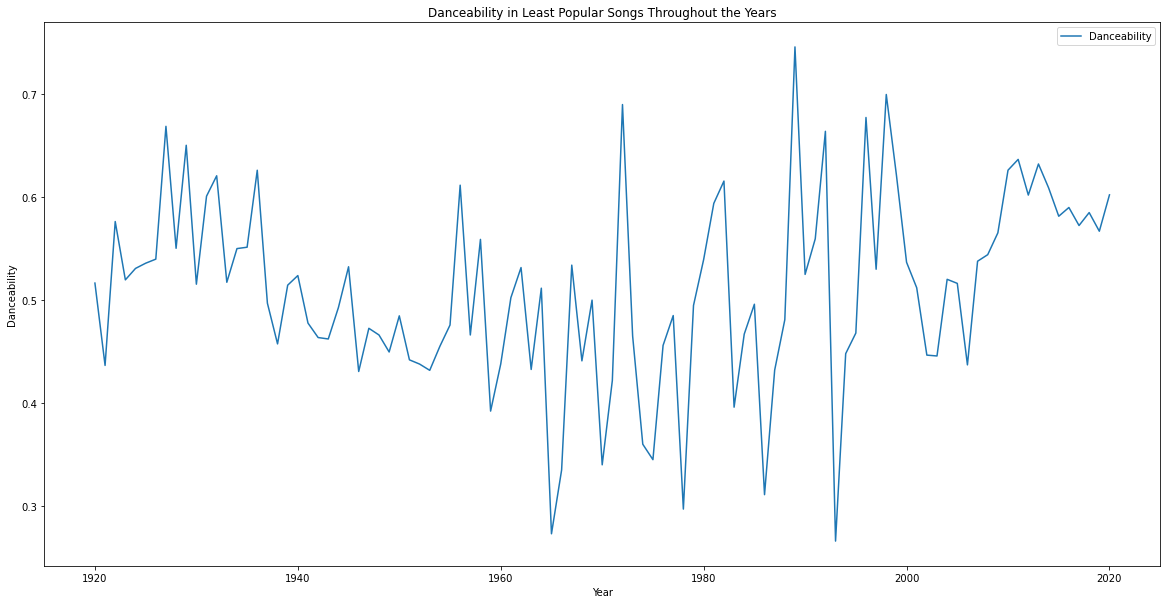

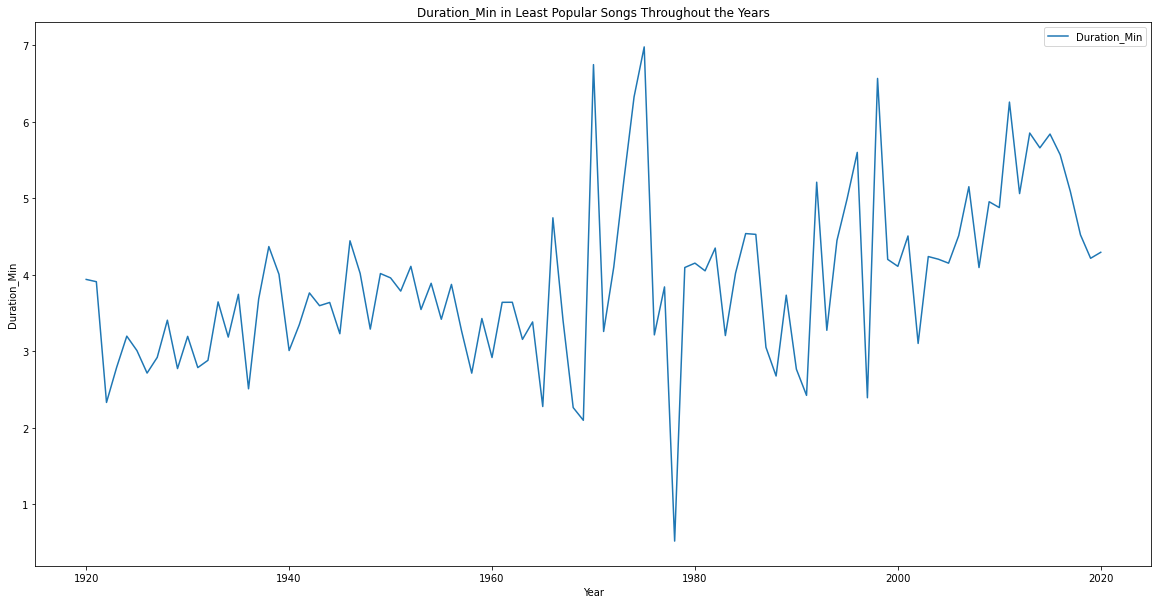

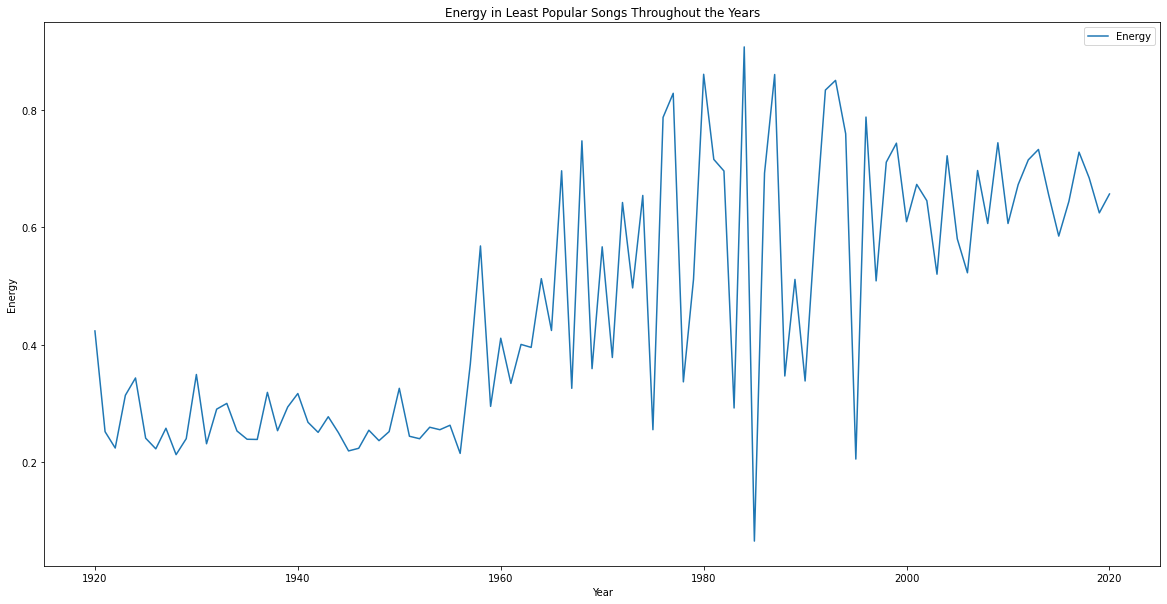

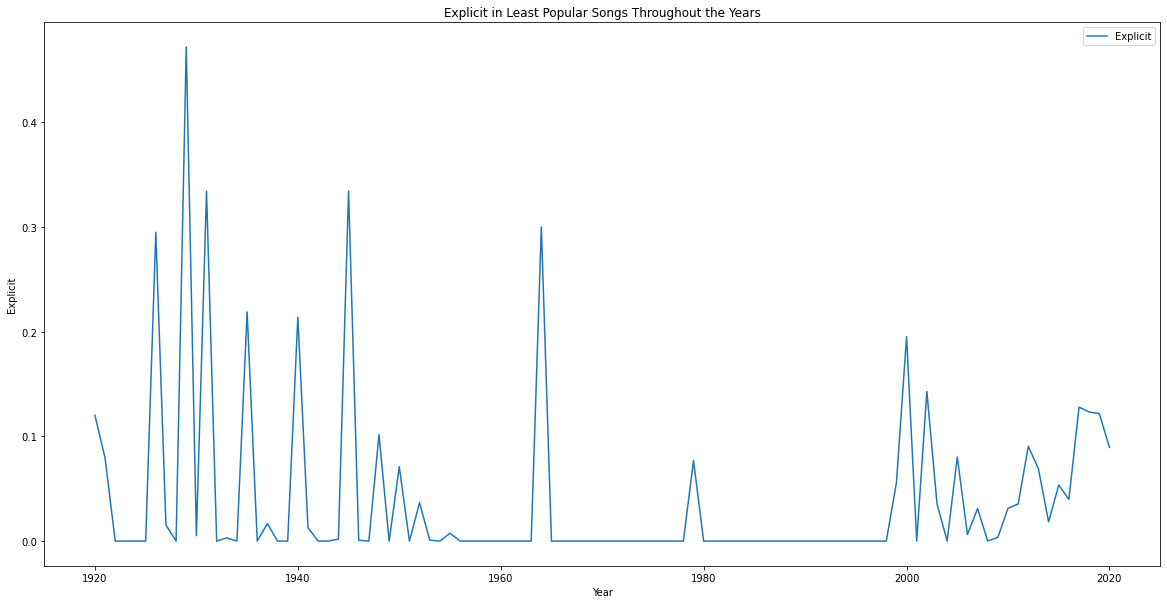

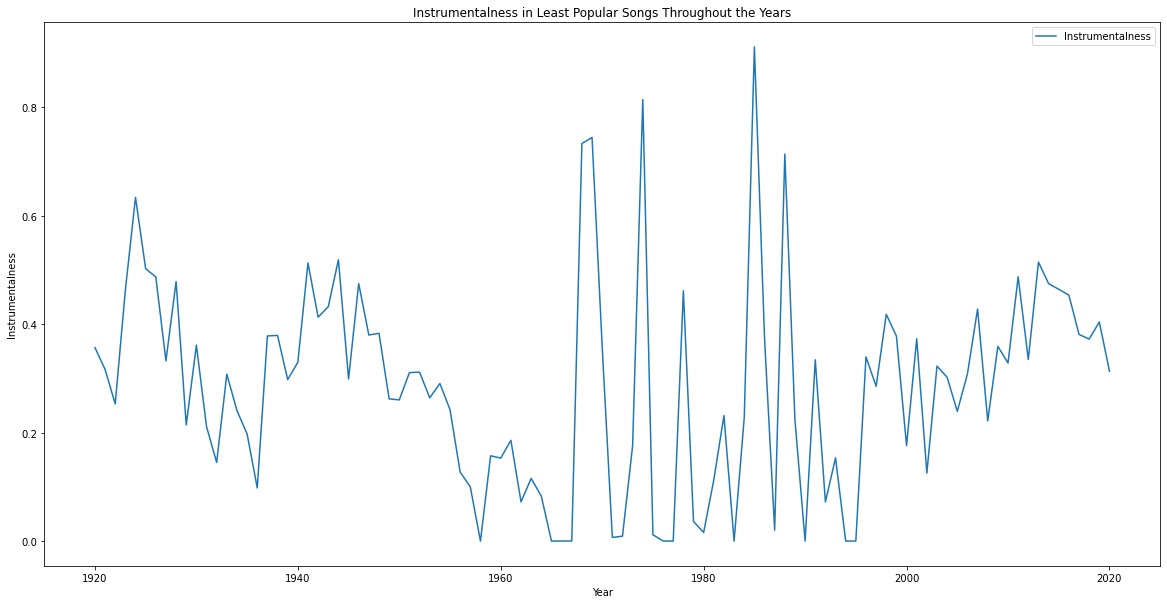

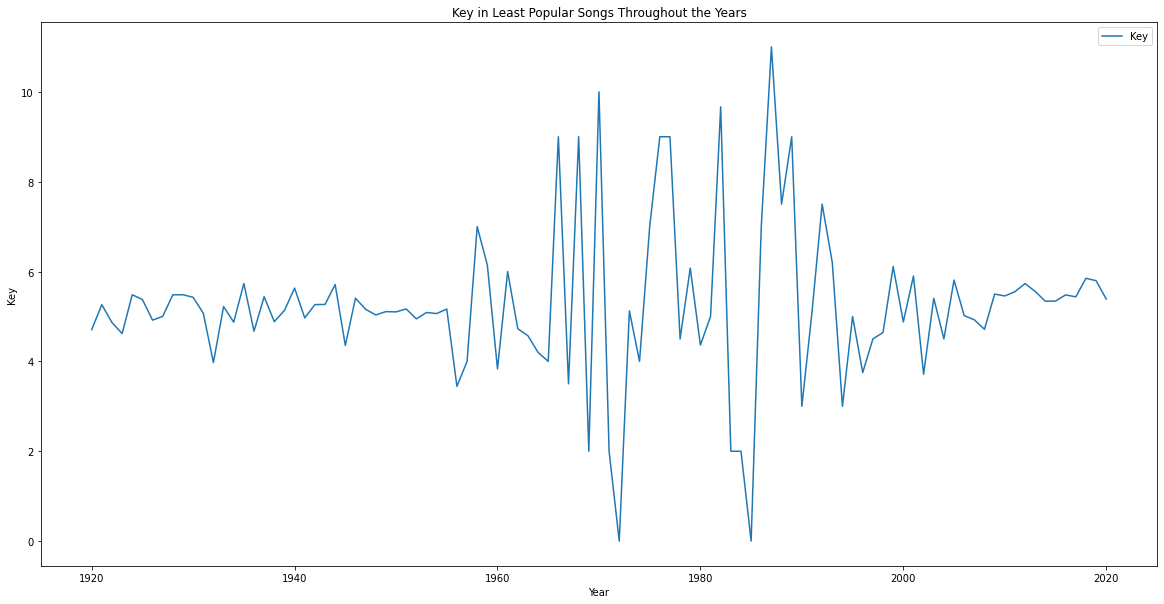

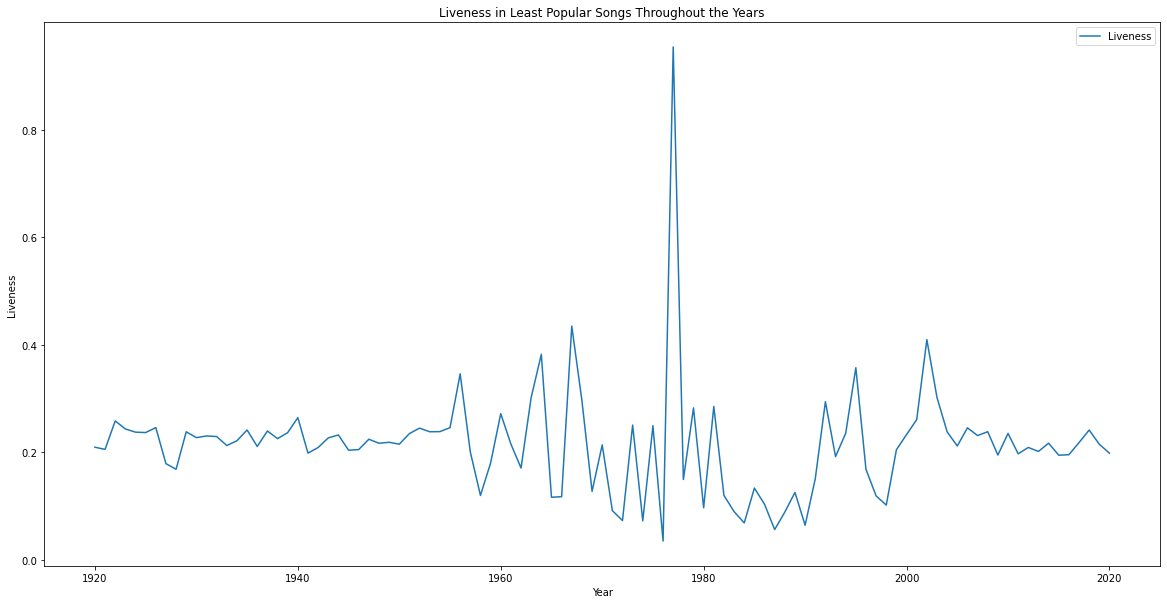

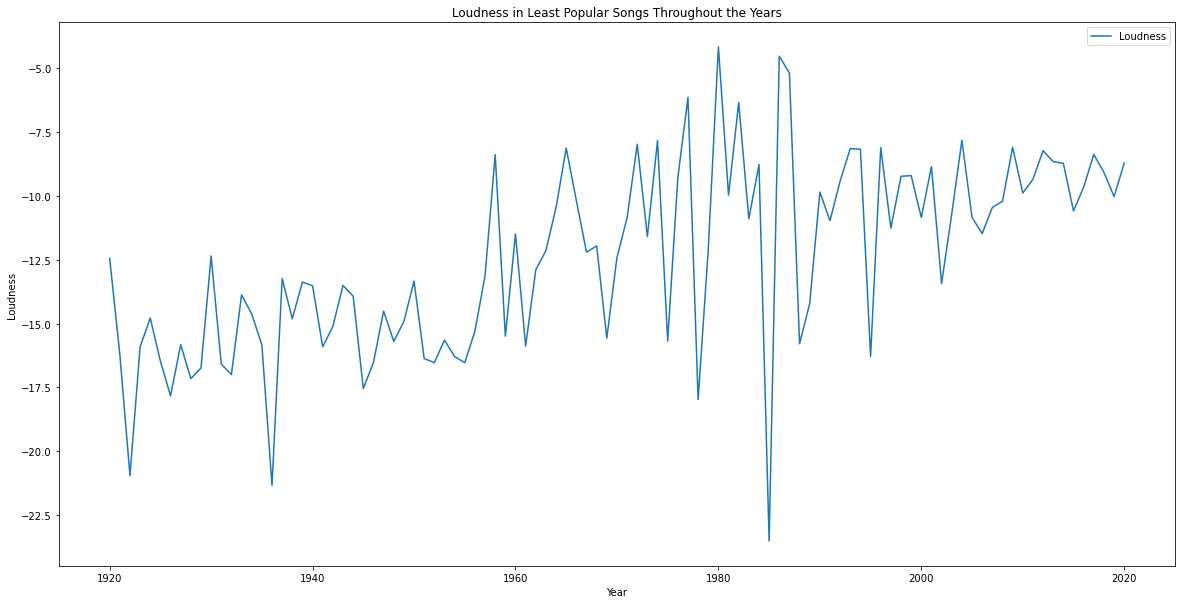

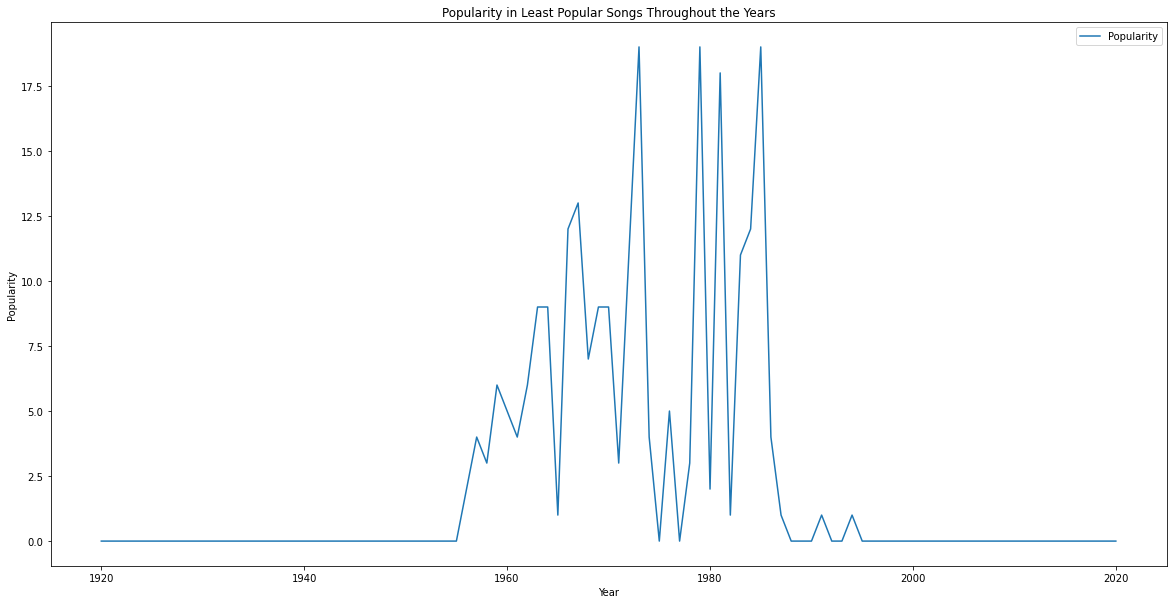

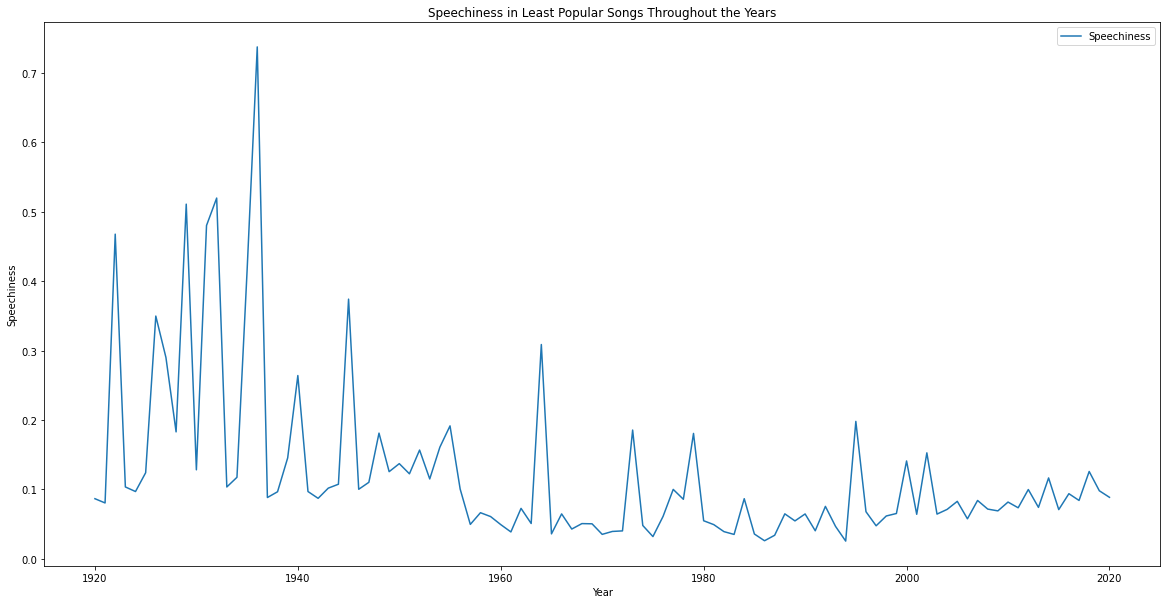

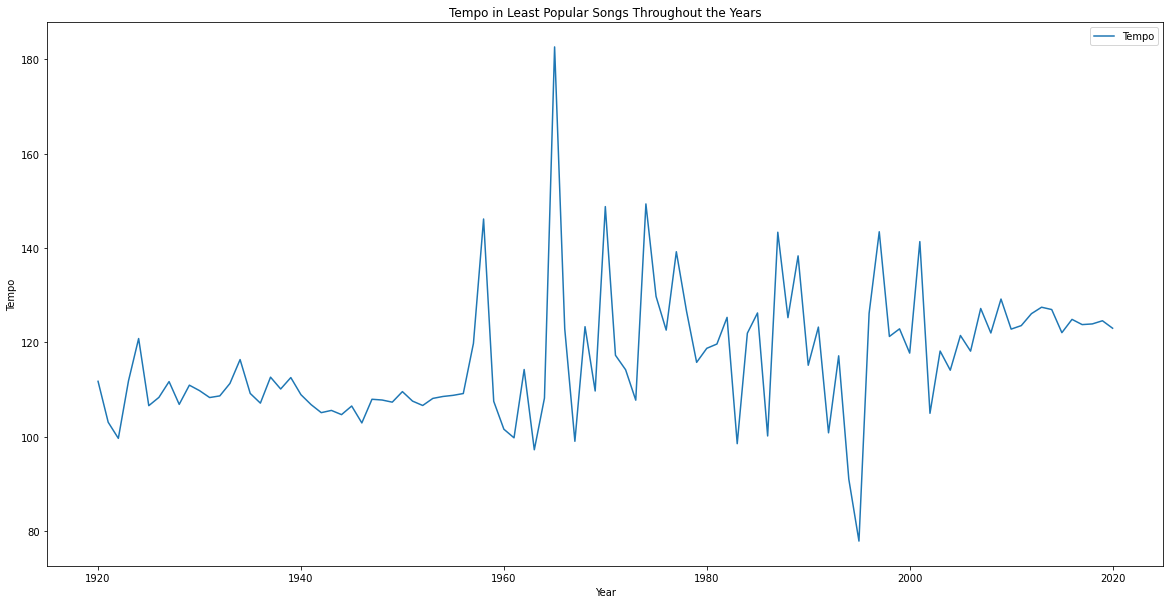

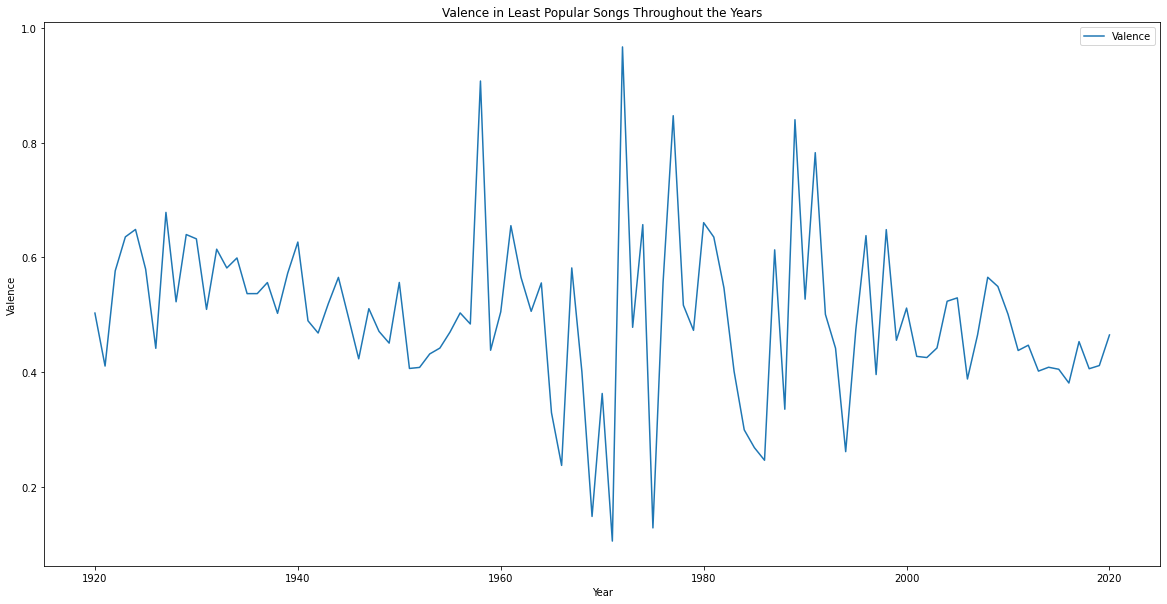

In [24]:
for i in column_list:
    df_final_mean2.plot(kind='line',x='Year',y=i,figsize=(20,10))
    plt.title(f'{i} in Least Popular Songs Throughout the Years')
    plt.xlabel('Year')
    plt.ylabel(i)
    plt.show();